# Redukcja wymiarów

## Wstęp

Zwizualizujmy sobie nastepujacy zestaw danych:

In [9]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Generate random data on a 2D manifold in 3D space
np.random.seed(42)
x = np.random.uniform(-2, 2, size=100)
y = np.random.uniform(-2, 2, size=100)
z = np.sin(np.sqrt(x ** 2 + y ** 2)) + np.random.normal(0, 0.2, size=100)

# Create 3D scatter plot of original data
fig = go.Figure()

# Add a surface plot of the 2D manifold
x_surf = np.linspace(-2, 2, 50)
y_surf = np.linspace(-2, 2, 50)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
Z_surf = np.sin(np.sqrt(X_surf ** 2 + Y_surf ** 2))

fig.add_trace(go.Surface(x=X_surf, y=Y_surf, z=Z_surf, colorscale='Blues', showscale=False))

# Add the 3D scatter plot of the original data
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5)))

# Update the layout with title and axis labels
fig.update_layout(title='Original 3D data on a 2D manifold with surface plot',
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

fig.show()


W obu przypadkach dane, które posiadamy są trójwymiarone, jednakże łatwo pokazać, że istnieje pewien dwuwymiarowy **manifold**, który przybliża nam prawdziwy rozkład danych - po zrzutowaniu na manifold nie tracimy zbyt wiele informacji (wariancji) oryginalnych danych.

W przypadku 3 wymiarów ta informacja nie jest zbytnio interesująca, jednakże gdy mamy do czynienia z dużą liczbą zmiennych (predyktorów) zrzutowanie ich do nisko-wymiarowej podprzestrzeni może być bardzo korzystne. Jest to tak zwana **redukcja wymiarów**.

Z reguły metody redukcji wymiarów dzielą się na **liniowe** jak na przykład **analiza głównych składowych (PCA)**, **analiza składowych niezależnych (ICA)**, **liniowe skalowanie wielowymiarowe** oraz **nieliniowe** jak na przykład **nie liniowe skalowanie wielowymiarowe**, **UMAP**, **t-SNE**.

Redukcja wymiarów przydaje się do:

- wizualizacji danych
- redukcji overfittingu (pozbycie sie klątwy wymiarór)
- selekcji/tworzenia zmiennych
- zakodowania zbioru danych

## Analiza głównych składowych (PCA)

Przyjmijmy, że mamy $p$ zmiennych, $X_j, \ (j = 1, ..., p)$, a obserwacje przeprowadzone na $n$ jednorodnych obiektach $(i = 1, ..., n)$ zebrane są w formie macierzy danych $X$, o której zakładamy, że jest pełnego rzędu (aby nie zmieniać struktury zmiennych jakąkolwiek liniową ich kombinacją). Zdefiniujmy dla tych zmiennych macierze zależności: macierz korelacji $R$ i macierz kowariancji $S$. Zakłada się przy tym, że macierze korelacji i kowariancji mają pewną liczbę różnych największych **wartości własnych**.

Idea **analizy głównych składowych** (PCA) polega na ortogonalnej transformacji układu badanych zmiennych $X_j$ w zbiór nowych nieobserwowanych zmiennych $Y_l$ które są liniowymi kombinacjami tych obserwowanych zmiennych, co możemy zapisać w postaci układu równań:

$$
\begin{array}{c}
Y_{1}=w_{11} X_{1}+w_{21} X_{2}+\ldots+w_{p 1} X_{p} \\
Y_{2}=w_{12} X_{1}+w_{22} X_{2}+\ldots+w_{p 2} X_{p} \\
\cdots \\
Y_{m}=w_{1 m} X_{1}+w_{2 m} X_{2}+\ldots+w_{p m} X_{p}\\
Y_{k} \perp Y_{l}, \ k\neq l
\end{array}
$$

W postaci uogólnionej układ ten zapiszemy:

$$
Y_{l}=w_{1 l} X_{1}+w_{2 l} X_{2}+\cdots+w_{p l} X_{p}=\sum_{j=1}^{p} w_{j l} X_{j}
$$

Nowe, przetworzone zmienne $Y_l$ noszą nazwę **głównych składowych** (ang. principal components) zmiennych $X_j$ lub też zmiennych składowych, zaś współczynniki $w_{jl}$ nazywają się **ładunkami składowymi** (ang. component loadings). Są one **nieskorelowane między sobą** (ortogonalne) i unormowane (suma kwadratów współczynników danej kombinacji $w_{jl}$ jest równa jeden), a suma wariancji składowych $Y_l$ jest równa ogólnej wariancji zmiennych $X_j$.

Podstawowy cel analizy głównych składowych, polega na identyfikacji struktury zależności, poprzez utworzenie zupłnie nowego zbioru istotnych zmiennych, który częściowo bądź całkowicie mógłby zastąpic pierwotny zbiór zmiennych. Cel ten określa sie jako redukcję wymiarowości (ang. reduction of dimensionality lub reduction of the basic dimensions) złozonego zjawiska. Dobrze jest bowiem, gdy złozoną strukture zaleznosci uda sie opisac niewielką liczbą głównych składowych, z możliwością ich
dalszego wykorzystania w innych technikach analizy wielowymiarowej.

Istnieje kilka różnych procedur uzyskiwania głównych składowych. Najpowszechniej stosowana jest **metoda Hotellinga** (1933), wykorzystująca **metodę mnożników Lagrange'a** maksymalizacji funkcji wielu zmiennych. Prześledzimy ją, przyjmując najpierw, że punktem wyjścia analizy jest macierz kowariancji $S$.

Rozważmy pierwszą główną składow¡ modelu:

$$
Y_{1}=w_{11} X_{1}+w_{21} X_{2}+\ldots+w_{p 1} X_{p} = \mathbf{w}_{1}^{\prime}x
$$
gdzie $\mathbf{w}_{1}^{\prime} = [w_{11}, ..., w_{p1}]$  której wariancja wynosi:

$$
S^{2}\left(Y_{1}\right)=\sum_{k=1}^{p} \sum_{j=1}^{p} w_{j 1} w_{k 1} s_{j k}=\mathbf{w}_{1}^{\prime} \mathbf{S} \mathbf{w}_{1}
$$

Jest to więc funkcja $p$ wspólczynników $w_{11}, ..., w_{p1}$, które musza być wybrane tak aby maksymalizować wariancję przy warunku $\mathbf{w}_{1}^{\prime}\mathbf{w}_{1}=1$. Warunek ten wprowadza ograniczenie na wartości $w_{j1}$ tak aby długość wektora $\mathbf{w}$ była równa $1$. Jest to tak zwany warunek normalizujący.

Do znalezienia wartości współczynników $\mathbf{w}_{1}^{\prime}$ stosuje się metodę Lagrange'a (metoda optmalizacyjna do znajdowania ekstremów funkcji różniczkowalnej). Oznaczmy przez $\lambda_1$ mnoznik oraz zdefiniujmy funkcje pomocniczą uwzględniającą ograniczenie normalizacyjne:

$$
\varphi=1-\mathbf{w}_{1}^{\prime} \mathbf{w}_{1} \equiv 0
$$

Utwórzmy funkcję Lagrange'a:

$$
L\left(\mathbf{w}_{1}\right)=S^{2}\left(Y_{1}\right)+\lambda_{1}\left(1-\mathbf{w}_{1}^{\prime} \mathbf{w}_{1}\right)=\mathbf{w}_{1}^{\prime} \mathbf{S} \mathbf{w}_{1}+\lambda_{1}\left(1-\mathbf{w}_{1}^{\prime} \mathbf{w}_{1}\right)
$$

a obliczoną pochodną względem wektora $w_1$, porównajmy do zera:

$$
\frac{\partial L}{\partial \mathbf{w}_{1}}=2 \mathbf{S} \mathbf{w}_{1}-2 \lambda_{1} \mathbf{w}_{1}=2\left(S-\lambda_{1} \mathrm{I}\right) \mathbf{w}_{1}=0
$$

A zatem poszukiwane współczynniki $w_1$, muszą spełniac $p$ jednorodnych równań liniowych:

$$
(S-\lambda_{1} \mathrm{I})\mathbf{w}_{1}=0
$$
Ponieważ rozwiązaniem nie może być wektor zerowy to $\lambda_1$ musi być liczbą spełniającą równanie wyznacznikowe:

$$
|S-\lambda_{1} \mathrm{I}|\mathbf{w}_{1}=0
$$
Z powyższego widać, że $\lambda_1$ musi być **wartością własną** macierzy $S$, zaś wektor $w_1$ jest zwiazanym z nią $wektorem własnym$:

$$
S\mathbf{w}_{1}=\lambda_{1}\mathbf{w}_{1}
$$
Mnożąc powyższe równanie lewostronnie przez $\mathbf{w}_{1}^{\prime}$ i wykorzystując ograniczenie normalizujące dostajemy:

$$
\mathbf{w}_{1}^{\prime} \mathbf{S} \mathbf{w}_{1}=\lambda_{1} \mathbf{w}_{1}^{\prime} \mathbf{w}_{1}=\lambda_{1}=S^{2}\left(Y_{1}\right)
$$

Ponieważ wektor współczynników ma być wybrany tak aby maksymalizować wariancje to $\lambda_1$ musi być **największa wartością własną** macierzy $S$. Pierwsza główna składowa jest zatem wyznaczona przez parę: wartość włansa - wektor własny $(\lambda_1, \mathbf{w}_{1})$

Współczynniki drugiej głównej składowej wyznaczamy jak poprzednio, metodą Lagrange'a, przy czym funkcja Lagrange'a jest tym razem dana wzorem uwzględniającym dwa ograniczenia:

$$
\begin{aligned}
L\left(\mathbf{w}_{2}\right) &=S^{2}\left(Y_{2}\right)+\lambda_{2}\left(1-\mathbf{w}_{2}^{\prime} \mathbf{w}_{2}\right)+\pi \mathbf{w}_{1}^{\prime} \mathbf{w}_{2}=\\
&=\mathbf{w}_{2}^{\prime} \mathbf{S} \mathbf{w}_{2}+\lambda_{2}\left(1-\mathbf{w}_{2}^{\prime} \mathbf{w}_{2}\right)+\pi \mathbf{w}_{1}^{\prime} \mathbf{w}_{2}
\end{aligned}
$$
gdzie $\pi$ jest drugim mnoznikiem, a $\mathbf{w}_{1}^{\prime} \mathbf{w}_{2} \equiv 0$ jest drugą funkcją pomocniczą (warunek ortogonalności). Rozwiązując równanie w analogiczny sposób dojdziemy do rozwiązaniem będącego **drugą co do wielkości wartością własną**. Analogicznie kolejnymi rozwiązaniami byłyby kolejne wartości własne, rozwiązanie wiec sprowadza się do znalezienia wartości własnych macierzy $S$, bedącymi pierwiastkami równaia:

$$
|S-\lambda \mathrm{I}|=0
$$
i uporządkowanie ich malejąco (zazwyczaj potrzebna jest także normalizacja).

Wagę l−tej głównej składowej mierzymy ilorazem:

$$
\mathrm{I}\left(Y_{l}\right)=\frac{\lambda_{l}}{\operatorname{tr} \mathrm{S}}(100 \%)
$$

który informuje nas jaki odsetek wariancji tłumaczony jest przez l-tą składową.

Wspóªczynniki głównych składowych $w_{jl}$ zasługują na uważną analizę. Ponieważ po normalizacji suma ich kwadratów jest równa jeden

$$
\sum_{j=1}^{p} w_{j l}^{2}=1, \quad l=1, \ldots, p
$$

są one wagami, z jakimi poszczególne zmienne $X_j$ komponują się wskładowe i mierzą tym samym znaczenie zmiennych w składowych. Znak współczynnika informuje o sposobie, zas moduł o wielko±ci wpływu j−tej zmiennej na l−tą gªówn¡ składową.

Z geometrycznego punktu widzenia ideą analizy głównych składowych jest opisanie zmienności układu n punktów w p−wymiarowej przestrzeni cech poprzez wprowadzenie nowego układu liniowych, ortogonalnych współrzędnych. Wariancje danych punktów względem wprowadzonych współrzędnych są uporządkowane malejąco. Rzuty punktów na pierwszą składową mają największą wariancję ze wszystkich możliwych liniowych współrzędnych.

Sprawdźmy jak PCA zadziała dla przykładowych danych:

Explained variance ratio: [92.5  5.3  1.7  0.5]


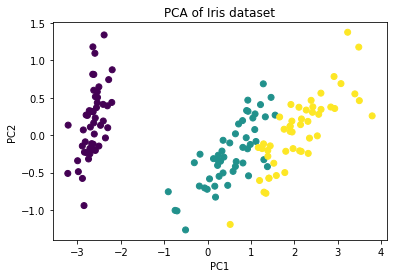

In [31]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_ * 100, 1))

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris dataset')
plt.show()

In [32]:
print("PCA components:")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1}: {component}")

PCA components:
PC1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
PC2: [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
PC3: [-0.58202985  0.59791083  0.07623608  0.54583143]
PC4: [-0.31548719  0.3197231   0.47983899 -0.75365743]


Zalety PCA:
 - zachowanie globalnej struktury danych
 - możliwość policzenia wartości składowych dla nowej obserwacji
 - łatwość interpretacji składowych (funckja liniowa orginałów)

Wady PCA:
 - nie zachowuje lokalnej struktury danych (clustry)
 - działa tylko dla liniowych danych
 - trudność w interpretacji (każda składowa zalezna od każdej orginalnej zmiennej - alternatywą jest **regularized PCA**)
 
Główne składowe mogą zostać uzyte jako nowe zmienne w dalszej analizie, np. w regresji lub klasyfikacji. jest to tak zwana **principal components regression/classification**.

## Analiza głównych koordynatów (PCoA) - klasyczne skalowanie wielowymiarowe (cMDS)

**Analiza głównych koordynatów** (PCoA) nazywana też klasycznym skalowaniem wielowymiarowym (cMDS) jest uogólnieniem PCA. Algorytm nalizy jest praktycznie identyczny, jednakze zamiast uzywac macierzy korelacji/kowariacnji używamy dowolnej **macierzy odległości** (zauważ, że użycie odległości euklidesowej jest równowazne z uzyciem macierzy korelacji co daje PCA).

Sprawdźmy różnicę między PCA i PCoA dla pewnych danych genetycznych:

In [33]:
gene_data = pd.read_csv("data/gene_data.csv")
gene_data.index = ("wt1", "wt2", "wt3", "wt4", "wt5", "ko1", "ko2", "ko3", "ko4", 
"ko5")
gene_data = gene_data.T
gene_data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,184,182,198,172,217,225,213,226,223,215
gene2,46,33,39,46,40,175,184,190,184,190
gene3,514,514,546,522,541,384,393,376,399,402
gene4,351,373,367,349,372,76,81,83,85,65
gene5,407,458,435,466,456,893,888,906,902,888
...,...,...,...,...,...,...,...,...,...,...
gene96,224,197,235,265,222,150,157,156,120,159
gene97,132,147,130,146,128,370,378,365,400,358
gene98,722,705,737,705,707,660,674,627,629,625
gene99,692,729,729,768,773,111,112,100,114,136


Explained variance ratio: [52.7 46.9  0.1  0.1  0.1  0.1  0.1  0.   0.   0. ]


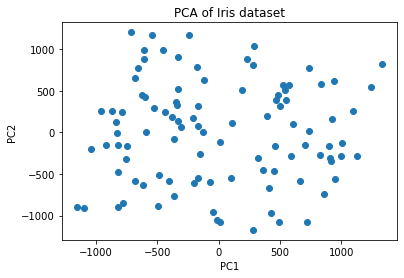

In [34]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(gene_data)

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_ * 100, 1))

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of gene_data dataset')
plt.show()

In [35]:
print("PCA components:")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1}: {component}")

PCA components:
PC1: [0.08127457 0.08298155 0.08333424 0.08414681 0.08129061 0.44262945
 0.43687409 0.43737576 0.43863074 0.44204162]
PC2: [ 0.43687206  0.44393575  0.44072212  0.43580253  0.44014022 -0.0782339
 -0.08766576 -0.08387587 -0.08294871 -0.08036871]
PC3: [ 0.07082437  0.1136786  -0.35304946 -0.29632445  0.45437515  0.35287292
 -0.24942523 -0.48378932  0.37730839  0.00249778]
PC4: [-0.10201587  0.43614987  0.08865578  0.12842482 -0.55174097 -0.02227745
  0.08974102 -0.22825288  0.52590308 -0.36520133]
PC5: [-0.26799249  0.47701531  0.25658763 -0.55955708  0.08412712 -0.40132155
 -0.0584095   0.06160633  0.01909102  0.38208276]
PC6: [-0.4497776   0.24816185 -0.46264284  0.58742163  0.07473098 -0.1547083
 -0.1804695   0.00933029 -0.01678355  0.33846105]
PC7: [ 0.17938799  0.17330667  0.07020431  0.00294795 -0.43544081  0.39308531
 -0.00510626 -0.43564347 -0.42617774  0.46613719]
PC8: [ 0.25615732  0.17230859 -0.10720949 -0.08929749 -0.24096217  0.19633073
 -0.71786398  0.521041

Sprawdźmy teraz co stanie się gdy użyjemy innej odległości. W genetyce czesto stosowana jest **Log Fold Change**:

$$
log_2FC(sample_1, sample_2) = mean(|log_2(sample_1) - log_2(sample_2)|)
$$


In [39]:
from sklearn.metrics import pairwise_distances
def log_2FC_dist(x, y):
    return np.mean(np.abs(np.log2(x) - np.log2(y)))

log2_distance_matrix = pairwise_distances(gene_data, metric=log_2FC_dist)
log2_distance_matrix

array([[0.        , 1.24293971, 1.14943388, ..., 1.72834866, 1.45367188,
        1.79267752],
       [1.24293971, 0.        , 2.39237359, ..., 2.97128838, 2.44066834,
        3.03561724],
       [1.14943388, 2.39237359, 0.        , ..., 0.57891478, 1.1305322 ,
        0.64324365],
       ...,
       [1.72834866, 2.97128838, 0.57891478, ..., 0.        , 1.28514068,
        0.39575268],
       [1.45367188, 2.44066834, 1.1305322 , ..., 1.28514068, 0.        ,
        1.28936218],
       [1.79267752, 3.03561724, 0.64324365, ..., 0.39575268, 1.28936218,
        0.        ]])

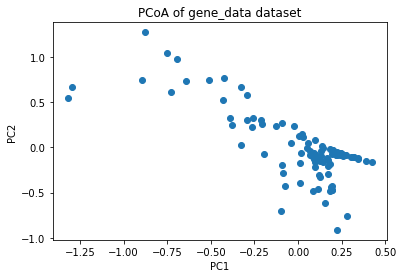

In [47]:
from sklearn.manifold import MDS

mds = MDS(n_components=10, dissimilarity="precomputed", n_init=10, max_iter=1000, eps=1e-9, random_state=42)
X_pcoa = mds.fit_transform(log2_distance_matrix)

# Plot the results
plt.scatter(X_pcoa[:, 0], X_pcoa[:, 1], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCoA of gene_data dataset')
plt.show()

## t-SNE

Metody takie jak PCA czy MDS działają dla nieskomplikowanych danych tabularycznych, lecz co jeśli chcielibyśmy redukcję wymiarów przeprowadzić dla tekstów, zdjęc lub innych złozonych danych? Na szczeście istnieje wiele nieliniowych metod, które mogą okazać się pomocne w takim przypadku.

**t-distributed stochastic neighbor embedding (t-SNE)** jest jedną z popularniejszych metod tego typu. Załóżmy, że mamy mamy $N$ obserwacji w przestrzeni p-wymiarowej. t-SNE stara się nauczyc niskowymiarowej reprezentacji (mapy) poprzez minimalizację **dywergencji Kullbacka–Leiblera**, będącej pseudo-odległością między rozkładami.

W kroku pierwszym liczone sa prawdopodobieństwa $p_{ij}$ proporcjonalne do podobieństwa między obserwacjami $x_i$ i $x_j$:

$$
p_{j \mid i}=\frac{\exp \left(-\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2} / 2 \sigma_{i}^{2}\right)}{\sum_{k \neq i} \exp \left(-\left\|\mathbf{x}_{i}-\mathbf{x}_{k}\right\|^{2} / 2 \sigma_{i}^{2}\right)}\\
p_{i \mid i} = 0
$$
a ostatecznie:

$$
p_{ij} = \frac{p_{j \mid i} + p_{i \mid j}}{2n}
$$

Powyższe wzory można roumiec w następujący sposób: podobienstwo punktu $x_j$ do $x_i$ jest wyrażone poprzez prawdopodobieństwo warunkowe $p_{j \mid i}$ tego, ze $x_i$ wybrał by $x_j$ jako swojego sąsiada, jesli sąsiedzi wybierani byliby proporcjonalnie względem rozkładu gausssowskiego z centrum w $x_i$.

Nastepnie t-SNE stara się odwzorować powyższe podobieństwa w przestrzenie niskowymiarowej. Podobienstwa w tej przestrzeni liczone są za pomocą wzoru:

$$
q_{i j}=\frac{\left(1+\left\|\mathbf{y}_{i}-\mathbf{y}_{j}\right\|^{2}\right)^{-1}}{\sum_{k} \sum_{l \neq k}\left(1+\left\|\mathbf{y}_{k}-\mathbf{y}_{l}\right\|^{2}\right)^{-1}}\\
q_{ii}=0
$$
Odwzorowanie podobieństwa przebiega poprzez cykliczne aktualizacje punktów $y_j$ w przestrzeni niskowymiarowej poprzez minimalizację dywergencji KL:

$$
\mathrm{KL}(P \| Q)=\sum_{i \neq j} p_{i j} \log \frac{p_{i j}}{q_{i j}}
$$

In [77]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

mnist = load_digits()
X, y = mnist["data"], mnist["target"]

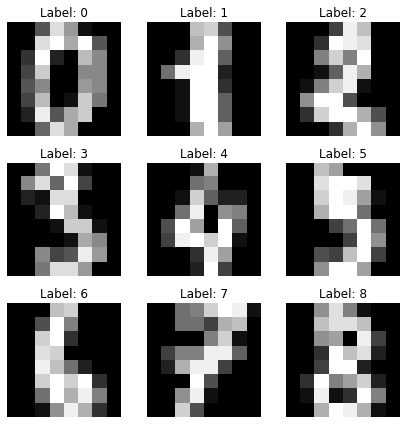

In [80]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(np.array(X[i, :]).reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Explained variance ratio: [14.9 13.6]


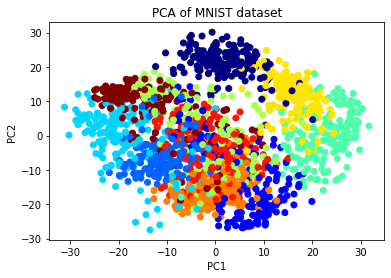

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_ * 100, 1))

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("jet", 10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of MNIST dataset')
plt.show()

/home/maju116/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



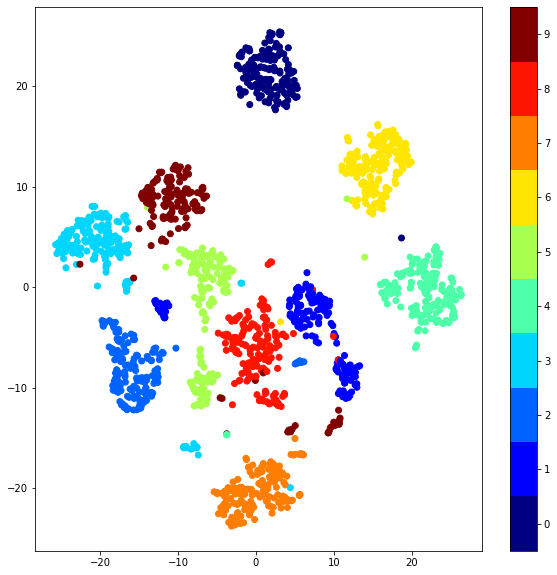

In [82]:
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=300, init="pca", learning_rate=200)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

Zalety t-SNE:
 - działa dla mocno nieliniowych, nieustrukturyzowanych danych
 - zachowuje lokalne i globalne struktury

Wady t-SNE
 - jako, że bazuje na odległościach pomiędzy punktami (wszystkimi) nie dostejemy możliwości przeliczenia dla nowej obserwacji (brak wzoru)
 - konieczność sprawdzenia wielu wartości `perplexity` i `max_iter`



In [74]:
from IPython.display import Video

Video("data/mnist_tsne.mov", embed=True)